### EDA and Feature Engineering on Black Friday Dataset.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set the working directory
import io
%cd "Datasets\"

e:\iNeuron\EDA_and_Feature_Engineering\Day_2_Black_Friday_Dataset\Datasets


In [3]:
# Read the datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# check the dimensions of train and the test data
print("Train Dataset:", train.shape)
print("Test Dataset:", test.shape)

Train Dataset: (550068, 12)
Test Dataset: (233599, 11)


In [5]:
# First five records from train data
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
# First five records from test data
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
# check the datatypes in train data
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
# check the datatypes present in test data
test.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [9]:
# Descriptive statistics of train data
train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,NaN,NaN,NaN,9.842329,5.08659,2.0,5.0,9.0,15.0,18.0


In [10]:
# Descriptive statistics of test data
test.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,233599.0,NaN,NaN,NaN,1003029.356859,1726.504968,1000001.0,1001527.0,1003070.0,1004477.0,1006040.0
Product_ID,233599,3491,P00265242,829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,233599,2,M,175772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,233599,7,26-35,93428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,233599.0,NaN,NaN,NaN,8.085407,6.521146,0.0,2.0,7.0,14.0,20.0
City_Category,233599,3,B,98566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,233599,5,1,82604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,233599.0,NaN,NaN,NaN,0.41007,0.491847,0.0,0.0,0.0,1.0,1.0
Product_Category_1,233599.0,NaN,NaN,NaN,5.276542,3.73638,1.0,1.0,5.0,8.0,18.0
Product_Category_2,161255.0,NaN,NaN,NaN,9.849586,5.094943,2.0,5.0,9.0,15.0,18.0


In [11]:
# Concise summary of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
# Concise summary of test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [13]:
# check for null/missing values in train data
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [14]:
def missing_values(data):
    for i in data.columns:
        missing = (data[i].isnull().sum()/data.shape[0])*100
        print(i, "=>", missing)

In [15]:
# check for % missing values in train data
missing_values(train)

User_ID => 0.0
Product_ID => 0.0
Gender => 0.0
Age => 0.0
Occupation => 0.0
City_Category => 0.0
Stay_In_Current_City_Years => 0.0
Marital_Status => 0.0
Product_Category_1 => 0.0
Product_Category_2 => 31.56664266963357
Product_Category_3 => 69.67265865311198
Purchase => 0.0


In [16]:
# check for duplicate records in train data
train.duplicated().sum()

0

In [17]:
# check for null/missing values in test data
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [18]:
# check for % missing values in test data
missing_values(test)

User_ID => 0.0
Product_ID => 0.0
Gender => 0.0
Age => 0.0
Occupation => 0.0
City_Category => 0.0
Stay_In_Current_City_Years => 0.0
Marital_Status => 0.0
Product_Category_1 => 0.0
Product_Category_2 => 30.96931065629562
Product_Category_3 => 69.59019516350669


In [19]:
# check for duplicate records in test data
test.duplicated().sum()

0

In [20]:
# We don't need User ID and Product_ID so we wil drop this columns
train_new = train.drop(['User_ID', 'Product_ID'], axis=1) 
test_new = test.drop(['User_ID', 'Product_ID'], axis=1)

In [21]:
print("Training Dataset:",train_new.shape)
print("Test Dataset:",test_new.shape)

Training Dataset: (550068, 10)
Test Dataset: (233599, 9)


In [22]:
missing_values(train_new)

Gender => 0.0
Age => 0.0
Occupation => 0.0
City_Category => 0.0
Stay_In_Current_City_Years => 0.0
Marital_Status => 0.0
Product_Category_1 => 0.0
Product_Category_2 => 31.56664266963357
Product_Category_3 => 69.67265865311198
Purchase => 0.0


In [23]:
train_new['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

#### Instead of removing the missing values we will exclude them during EDA and when we train model we will impute them with "missing_data" in later stages of this project

In [24]:
# Handling the Gender column
train_new['Gender'] = train_new['Gender'].map({'F':0, 'M':1})
train_new.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [25]:
# Handling the Age column
train_new['Age'] = train_new['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
train_new.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370
1,0,1,10,A,2,0,1,6.0,14.0,15200
2,0,1,10,A,2,0,12,NaN,NaN,1422
3,0,1,10,A,2,0,12,14.0,NaN,1057
4,1,7,16,C,4+,0,8,NaN,NaN,7969


In [26]:
# Handling the City Category Column
train_new['City_Category'] = train_new['City_Category'].map({'A':1, 'B':2, 'C':3})
train_new.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,NaN,NaN,8370
1,0,1,10,1,2,0,1,6.0,14.0,15200
2,0,1,10,1,2,0,12,NaN,NaN,1422
3,0,1,10,1,2,0,12,14.0,NaN,1057
4,1,7,16,3,4+,0,8,NaN,NaN,7969


In [27]:
# Handling the Stay in Current City Years Column
train_new['Stay_In_Current_City_Years'] = train_new['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4})
train_new.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,NaN,NaN,8370
1,0,1,10,1,2,0,1,6.0,14.0,15200
2,0,1,10,1,2,0,12,NaN,NaN,1422
3,0,1,10,1,2,0,12,14.0,NaN,1057
4,1,7,16,3,4,0,8,NaN,NaN,7969


In [28]:
train_new.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [29]:
test_new['Gender'] = test_new['Gender'].map({'F':0, 'M':1})
test_new['Age'] = test_new['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
test_new['City_Category'] = test_new['City_Category'].map({'A':1, 'B':2, 'C':3})
test_new['Stay_In_Current_City_Years'] = test_new['Stay_In_Current_City_Years'].map({'0':0, '1':1, '2':2, '3':3, '4+':4})

In [30]:
test_new.dtypes

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [31]:
test_new.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,5,7,2,2,1,1,11.0,NaN
1,1,3,17,3,0,0,3,5.0,NaN
2,0,4,1,2,4,1,5,14.0,NaN
3,0,4,1,2,4,1,4,9.0,NaN
4,0,3,1,3,1,0,4,5.0,12.0


In [32]:
# Number of males and females in the dataset
train_new['Gender'].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

In [33]:
gender_names = train_new['Gender'].value_counts().index
gender_values = train_new['Gender'].value_counts().values

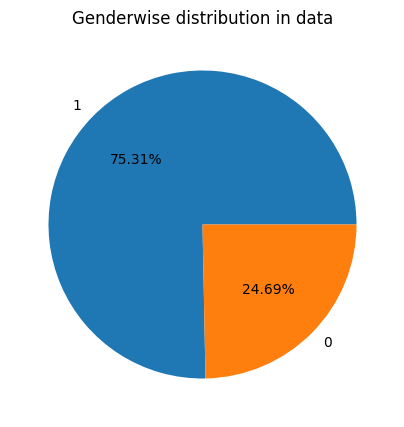

In [34]:
plt.figure(figsize=(5,5))
plt.pie(x=gender_values, labels=gender_names, autopct='%1.2f%%')
plt.title("Genderwise distribution in data")
plt.show()

#### As you can see from above pie chart the number of males is higher than females in our dataset i.e. 75.31% are males and 24.69% are females in the data given.

In [35]:
# Genderwise purchase behavior in the data
train_new.groupby(['Gender'])['Purchase'].mean()

Gender
0    8734.565765
1    9437.526040
Name: Purchase, dtype: float64

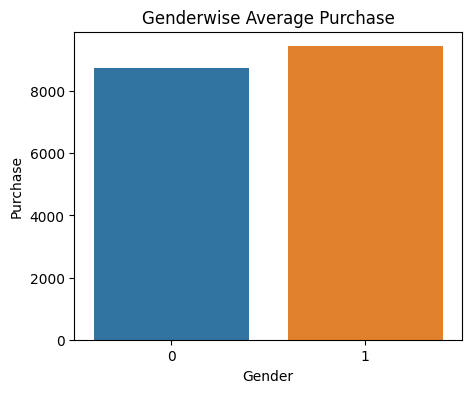

In [36]:
plt.figure(figsize=(5,4))
sns.barplot(x='Gender', y='Purchase', data=train_new, dodge=False, ci=None, estimator=np.mean)
plt.title("Genderwise Average Purchase")
plt.show()

#### Genderwise average purchase is higher for Males than Females. 

In [37]:
# Age Group and Genderwise Purchase behaviour
train_new.groupby(['Age', 'Gender'])['Purchase'].mean()

Age  Gender
1    0         8338.771985
     1         9235.173670
2    0         8343.180201
     1         9440.942971
3    0         8728.251754
     1         9410.337578
4    0         8959.844056
     1         9453.193643
5    0         8842.098947
     1         9357.471509
6    0         9042.449666
     1         9705.094802
7    0         9007.036199
     1         9438.195603
Name: Purchase, dtype: float64

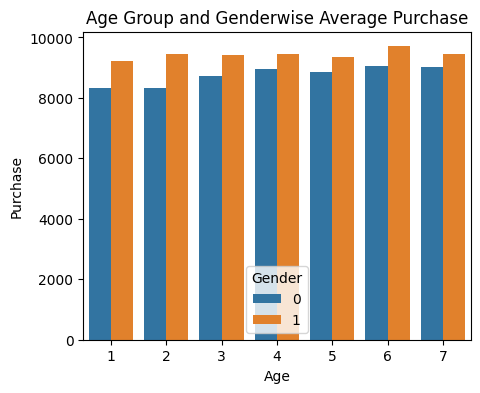

In [38]:
plt.figure(figsize=(5,4))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=train_new, ci=None, estimator=np.mean)
plt.title("Age Group and Genderwise Average Purchase")
plt.show()

#### For every age group the average purchase is higher for males than females.

In [39]:
# Occupation and Genderwise Purchase behavior
train_new.groupby(['Occupation', 'Gender'])['Purchase'].mean()

Occupation  Gender
0           0          8827.508447
            1          9228.799538
1           0          8496.815280
            1          9231.961755
2           0          8409.951327
            1          9213.158472
3           0          9055.138149
            1          9279.059603
4           0          8536.909677
            1          9435.676366
5           0          8826.599099
            1          9446.089083
6           0          9078.405882
            1          9375.727101
7           0          9092.302553
            1          9493.818898
8           0          9361.451524
            1          9584.729114
9           0          8592.587198
            1          9226.694196
10          0          8194.751187
            1          9302.215302
11          0          9090.800000
            1          9232.145350
12          0          9155.953301
            1          9876.847492
13          0          8562.755674
            1          9485.148154
1

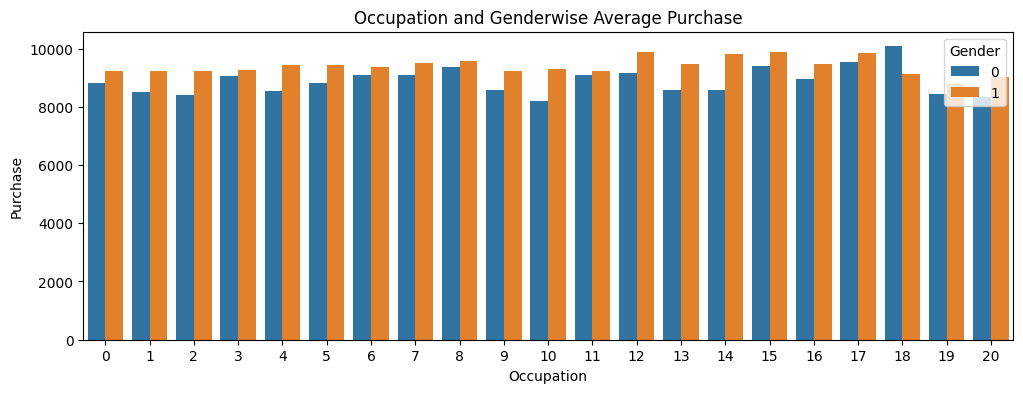

In [40]:
plt.figure(figsize=(12,4))
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=train_new, ci=None, estimator=np.mean)
plt.title("Occupation and Genderwise Average Purchase")
plt.show()

#### Except for Occupation : 18, In every other occupation the average purchase of males is higher than females.

In [41]:
# City Category and Genderwise Purchase behaviour
train_new.groupby(['City_Category', 'Gender'])['Purchase'].mean()

City_Category  Gender
1              0         8579.708576
               1         9017.834470
2              0         8540.677694
               1         9354.854433
3              0         9130.107518
               1         9913.567248
Name: Purchase, dtype: float64

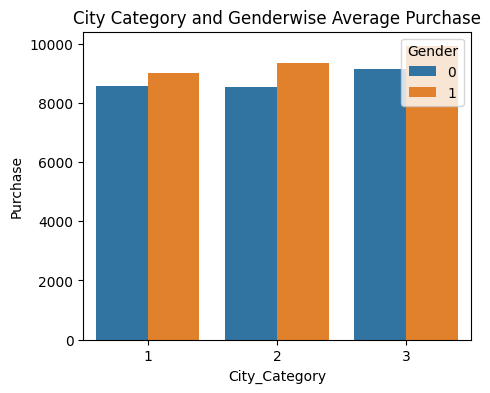

In [42]:
plt.figure(figsize=(5,4))
sns.barplot(x='City_Category', y='Purchase', hue='Gender', data=train_new, ci=None, estimator=np.mean)
plt.title("City Category and Genderwise Average Purchase")
plt.show()

### Here we also observed that average purchase is higher for males than females.

In [43]:
# Stay in current city years and genderwise purchase behaviour
train_new.groupby(['Stay_In_Current_City_Years', 'Gender'])['Purchase'].mean()

Stay_In_Current_City_Years  Gender
0                           0         8606.040497
                            1         9350.908869
1                           0         8775.052244
                            1         9421.145380
2                           0         8740.516357
                            1         9502.486091
3                           0         8695.236582
                            1         9491.916315
4                           0         8784.883738
                            1         9413.589778
Name: Purchase, dtype: float64

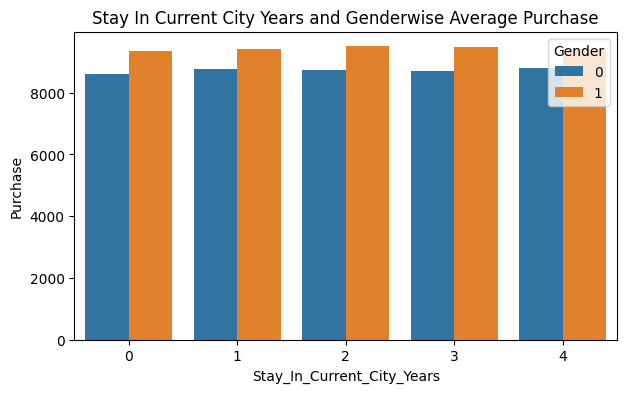

In [44]:
plt.figure(figsize=(7,4))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', hue='Gender', data=train_new, ci=None, estimator=np.mean)
plt.title("Stay In Current City Years and Genderwise Average Purchase")
plt.show()

#### Here also average purchase is higher for males than females.

In [45]:
# Marital Status and genderwise purchase behavior
train_new.groupby(['Marital_Status', 'Gender'])['Purchase'].mean()

Marital_Status  Gender
0               0         8679.845815
                1         9453.756740
1               0         8810.249789
                1         9413.817605
Name: Purchase, dtype: float64

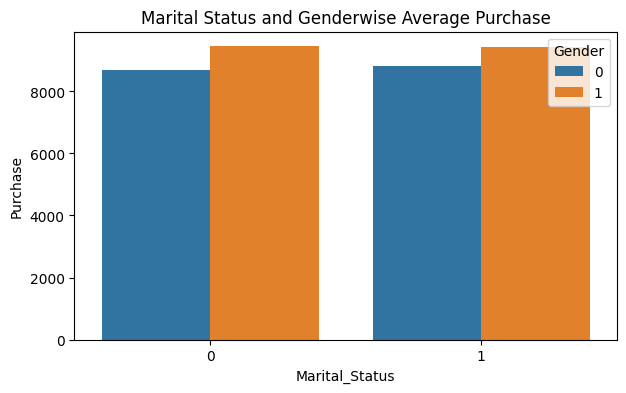

In [46]:
plt.figure(figsize=(7,4))
sns.barplot(x='Marital_Status', y='Purchase', hue='Gender', data=train_new, ci=None, estimator=np.mean)
plt.title("Marital Status and Genderwise Average Purchase")
plt.show()

#### Average purchase is higher for males than females irrespective of marital status.

In [47]:
# Product Category 1 and genderwise purchase behaviour
train_new.groupby(['Product_Category_1', 'Gender'])['Purchase'].mean()

Product_Category_1  Gender
1                   0         13597.162619
                    1         13608.164721
2                   0         11407.496819
                    1         11203.590520
3                   0         10262.656677
                    1         10026.550081
4                   0          2454.851882
                    1          2273.512694
5                   0          6307.239532
                    1          6214.230729
6                   0         15596.428164
                    1         15907.851009
7                   0         16394.853659
                    1         16355.789777
8                   0          7499.924787
                    1          7498.554419
9                   0         15724.314286
                    1         15498.888235
10                  0         19692.076592
                    1         19670.731264
11                  0          4676.371808
                    1          4687.425261
12                  0      

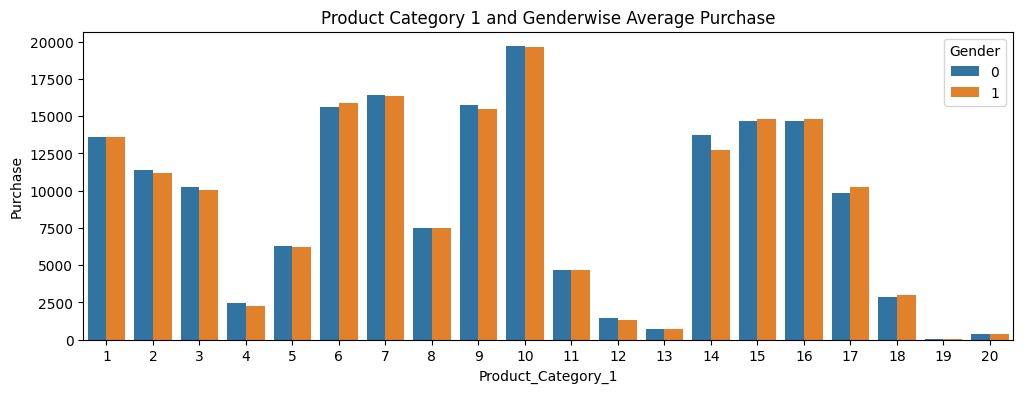

In [48]:
plt.figure(figsize=(12,4))
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=train_new, ci=None, estimator=np.mean)
plt.title("Product Category 1 and Genderwise Average Purchase")
plt.show()

#### The average purchase is nearly same for males and females considering product category 1.

In [49]:
product_2 = train_new[~train_new['Product_Category_2'].isnull()]

In [50]:
# Product Category 2 and genderwise purchase behaviour.
product_2.groupby(['Product_Category_2', 'Gender'])['Purchase'].mean()

Product_Category_2  Gender
2.0                 0         13753.213175
                    1         13588.586536
3.0                 0         11085.956240
                    1         11276.022056
4.0                 0         10518.936868
                    1         10087.036494
5.0                 0          8049.638343
                    1          9327.658118
6.0                 0         10734.587967
                    1         11695.631727
7.0                 0          6885.255474
                    1          6884.523517
8.0                 0          9461.306431
                    1         10555.451586
9.0                 0          7195.853707
                    1          7305.959724
10.0                0         15454.711957
                    1         15710.626788
11.0                0          8476.255628
                    1          9052.948770
12.0                0          7069.473050
                    1          6932.148784
13.0                0      

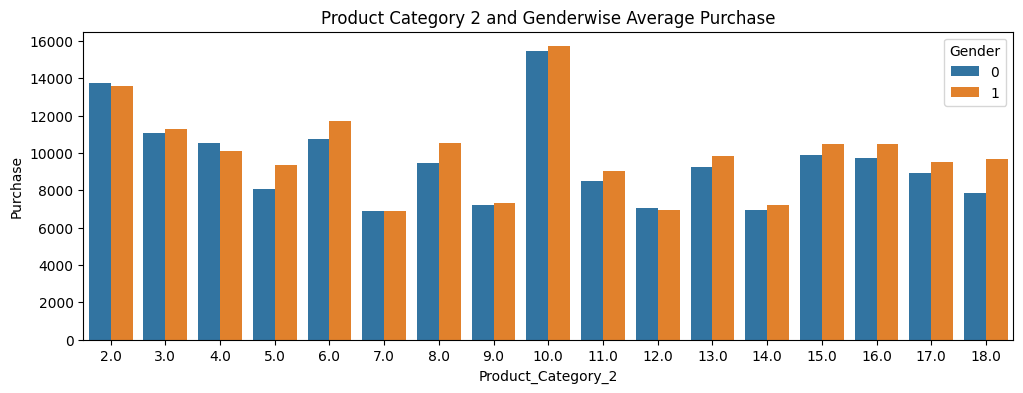

In [51]:
plt.figure(figsize=(12,4))
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=product_2, ci=None, estimator=np.mean)
plt.title("Product Category 2 and Genderwise Average Purchase")
plt.show()

#### The average purchase is nearly same for males and females considering product category 2.

In [52]:
product_3 = train_new[~train_new['Product_Category_3'].isnull()]

In [53]:
# Product Category 3 and genderwise purchase behaviour.
product_3.groupby(['Product_Category_3', 'Gender'])['Purchase'].mean()

Product_Category_3  Gender
3.0                 0         13136.294737
                    1         14087.038610
4.0                 0         10425.995381
                    1          9604.728849
5.0                 0         12147.258552
                    1         12107.541785
6.0                 0         13040.393720
                    1         13225.685623
8.0                 0         12173.713703
                    1         13285.119946
9.0                 0         10039.561286
                    1         10549.562619
10.0                0         13423.688406
                    1         13531.727896
11.0                0         11454.236527
                    1         12236.118287
12.0                0          8900.139236
                    1          8638.481300
13.0                0         13131.153784
                    1         13200.797872
14.0                0          9503.912680
                    1         10293.534635
15.0                0      

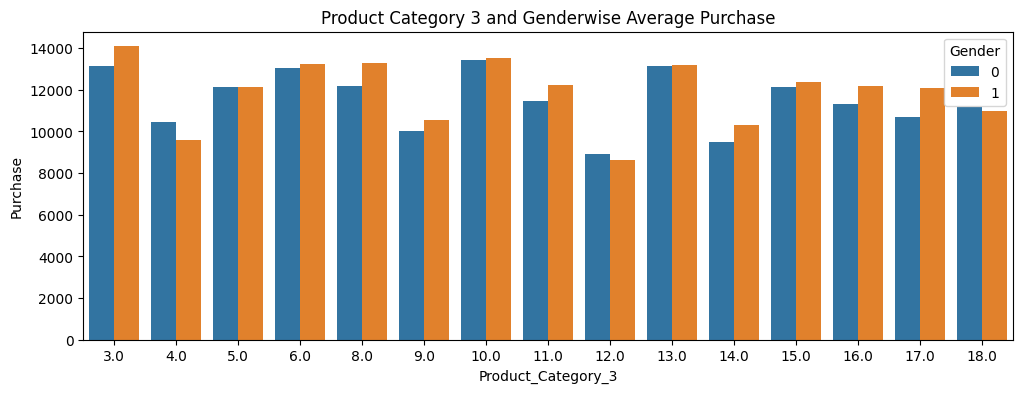

In [54]:
plt.figure(figsize=(12,4))
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=product_3, ci=None, estimator=np.mean)
plt.title("Product Category 3 and Genderwise Average Purchase")
plt.show()

#### The average purchase is nearly same for males and females considering product category 3.

In [55]:
# Now we will impute the missing values using mode 
train_new['Product_Category_2'] = train_new['Product_Category_2'].fillna(train_new['Product_Category_2'].mode()[0])
train_new['Product_Category_3'] = train_new['Product_Category_3'].fillna(train_new['Product_Category_3'].mode()[0])

In [56]:
train_new.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [57]:
# Similarly for test data we will impute the missing values using mode
test_new['Product_Category_2'] = test_new['Product_Category_2'].fillna(test_new['Product_Category_2'].mode()[0])
test_new['Product_Category_3'] = test_new['Product_Category_3'].fillna(test_new['Product_Category_3'].mode()[0])

In [58]:
test_new.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [59]:
# Now we will create our independent and dependent features
X = train_new.drop(['Purchase'], axis=1)
y = train_new['Purchase']

In [60]:
# Now we will split the dataset into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [61]:
# Now we will scale the data to bring it into the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
# We will scale train data as well as our test data.
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
test_new_scaled = sc.transform(test_new)

#### XGBoost Regressor

In [63]:
# XGBoost Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [64]:
# fit training data
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [65]:
# check model score
xgb.score(X_train_scaled, y_train)

0.6794647290555376

In [66]:
# predict on test data
xgb_pred = xgb.predict(X_test_scaled)

In [67]:
# check the accuracy
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, xgb_pred)))
print("R2 Score:", r2_score(y_test, xgb_pred))

Root Mean Squared Error: 2895.7305386154885
R2 Score: 0.6684572743804651


#### As you can see that with XGBoost Regressor we got model score : 67.94% and on test data accuracy : 66.84% with RMSE : 2895.73. So, we can say that XGBoost Regressor is performing very good on this dataset.